## Task 2 – Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
billGatesTimelineFrame = pd.read_csv('billGatesTimelineFrame.csv').fillna('N/A')
elonMuskTimelineFrame = pd.read_csv('elonMuskTimelineFrame.csv').fillna('N/A')
ellenDeGeneresTimelineFrame = pd.read_csv('ellenDeGeneresTimelineFrame.csv').fillna('N/A')
usersFrame = pd.read_csv('usersFrame.csv').fillna('N/A')
###IMPORTANT
usersFrame = usersFrame.drop(['Unnamed: 0'], axis=1)

### Importing libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Comparison between accounts

#### Followers and attemp to interpret the reason 

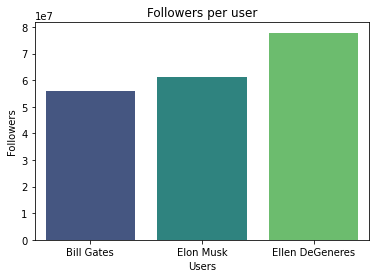

In [4]:
ax = sns.barplot(x='name', y='followers_count', data=usersFrame,palette='viridis')# I just prefer the colors like that
ax.set(xlabel='Users', ylabel='Followers', title='Followers per user')
plt.show()

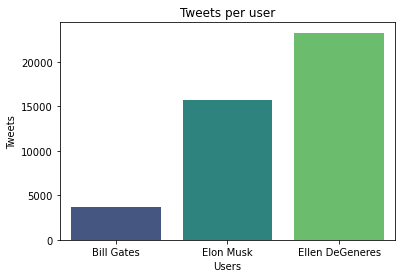

In [5]:
ax = sns.barplot(x='name', y='statuses_count', data=usersFrame,palette='viridis')
ax.set(xlabel='Users', ylabel='Tweets', title='Tweets per user')
plt.show()

As we can see on the above bar plot Ellen has the most followers following by Ellon and last is Bill. We can also see that the same rank exists with the number of tweets per users. The explanation for this could be that the more tweets a user has the more followers the user will have. Lets see how corellated the values are

In [6]:
usersFrame.corr()['followers_count']

id                 -0.997632
followers_count     1.000000
friends_count       0.970089
listed_count       -0.319700
favourites_count    0.130364
statuses_count      0.913517
status.id          -0.872444
Name: followers_count, dtype: float64

In the above table we can see that there is a very strong correlation between the user friends and the user followers, which is to be expected. Also as expected from the bar plots above there is a strong correlation between the number of tweets and the followers. One reason for this could be that the more tweets you have the more likely the posibility that someone will discover you. 

Whats suprising on the table above is that there is a very small correlation between the users likes and the tweeter followers, it would be expected that due to social rules if someone likes your tweet regualarly you should follow him, one way to explain this however is that the user would like tweets regularly from particular accounts while the other users will like tweets from fun too, but not as regular. 

It is important to note though that with a sample of three users the correlation could easily be wrong.

In [7]:
usersFrame['followers per following'] = usersFrame['followers_count']/usersFrame['friends_count']

In [8]:
usersFrame[['name', 'followers per following']]

,name,followers per following
0,Bill Gates,169577.060790
1,Elon Musk,577349.037736
2,Ellen DeGeneres,2931.894537


Finally as we can see all of the users have a huge followers per following ration, as can be expected from influnchers, with Elon having the biggest one and Ellen the smallest. This could also be the reason that Ellen has more followers, a lot of her followers are just following her back, however we dont have enough information to prove that

#### Original tweets vs retweets

In [9]:
# Fun fact retweets have zero likes because the users cant like them
billRe = len(billGatesTimelineFrame.loc[billGatesTimelineFrame['favorite_count'] == 0])
elonRe = len(elonMuskTimelineFrame.loc[elonMuskTimelineFrame['favorite_count'] == 0])
ellenRe = len(ellenDeGeneresTimelineFrame.loc[ellenDeGeneresTimelineFrame['favorite_count'] == 0])

billOr = len(billGatesTimelineFrame) - billRe
elonOr = len(elonMuskTimelineFrame) - elonRe
ellenOr = len(ellenDeGeneresTimelineFrame) - ellenRe 

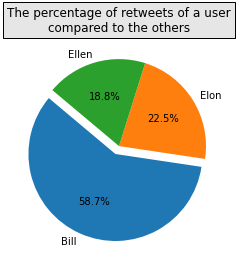

In [10]:
data = [billRe, elonRe, ellenRe]
labels=['Bill', 'Elon', 'Ellen']
#Explode the first slice
explode = (0.1, 0, 0)
plt.pie(data, labels=labels, explode=explode,
autopct='%1.1f%%', startangle=140)
plt.title('The percentage of retweets of a user\n' +'compared to the others', bbox={'facecolor':'0.9', 'pad':4})
plt.show()

In [11]:
import math
def createPer(number):
    return str('{0:.3g}'.format(number/3)) + '%'

In [12]:
data = {'Bill':[createPer(billRe), createPer(billOr)], 'Elon':[createPer(elonRe),createPer(elonOr)], 'Ellen':[createPer(ellenRe), createPer(ellenOr)]}
usersTweetsPercentages = pd.DataFrame(data, index=['Retweets Percentage', 'Original Tweets Percentage'])
usersTweetsPercentages

,Bill,Elon,Ellen
Retweets Percentage,15.7%,6%,5%
Original Tweets Percentage,84.3%,94%,95%


By looking at the pie chart and also at the table we can see that Bill has more retweets than Elon and Ellen combined. However all three users have a relative small retweet percentage with Bill having the higher at 15.7% of his three hundread last tweets

### Analyzing each user's tweets

#### Tweets with more likes for every user

In [13]:
## Bill gates tweet with the most likes - the divorce
billGatesTimelineFrame.sort_values('favorite_count',ascending=False).head(1)

,Unnamed: 0,created_at,id,text,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,hashtags,user_mentions
136,136,Mon May 03 20:30:19 +0000 2021,1389316412259270657,https://t.co/padmHSgWGc,False,N/A,N/A,N/A,False,38468,214541,N/A,N/A


In [14]:
## Elon Musk tweet with the most likes
elonMuskTimelineFrame.sort_values('favorite_count',ascending=False).head(1)

,Unnamed: 0,created_at,id,text,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,hashtags,user_mentions
14,14,Thu Oct 21 02:41:14 +0000 2021,1451015695106560000,https://t.co/pCO0wNNZtz,False,N/A,N/A,N/A,False,77899,660771,N/A,N/A


In [15]:
## Ellen tweet with the most likes
ellenDeGeneresTimelineFrame.sort_values('favorite_count',ascending=False).head(1)

,Unnamed: 0,created_at,id,text,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,hashtags,user_mentions
231,231,Mon Aug 16 15:14:53 +0000 2021,1427287755969622016,"Happy anniversary, Portia. I’m the luckiest gi...",False,N/A,N/A,N/A,False,591,41314,N/A,N/A


#### Who has the most likes and retweets

<AxesSubplot:xlabel='Name', ylabel='Value'>

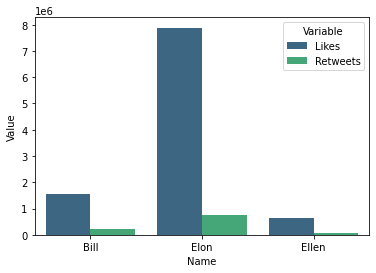

In [16]:
billLikes = billGatesTimelineFrame['favorite_count'].sum()
elonLikes = elonMuskTimelineFrame['favorite_count'].sum()
ellenLikes = ellenDeGeneresTimelineFrame['favorite_count'].sum()
billRe = billGatesTimelineFrame['retweet_count'].sum()
elonRe = elonMuskTimelineFrame['retweet_count'].sum()
ellenRe = ellenDeGeneresTimelineFrame['retweet_count'].sum()
d = {'Name':['Bill', 'Elon', 'Ellen'], 
     'Likes' : [billLikes, elonLikes, ellenLikes], 
     'Retweets':[billRe, elonRe, ellenRe]}
tweetFrame = pd.DataFrame(d)
tidy = tweetFrame.melt(id_vars='Name').rename(columns=str.title)
sns.barplot(x='Name', y='Value',hue='Variable', data=tidy,palette='viridis')

By looking at the above graph we can see that Elon has was more likes than the other two. Also quite suprising is that elen even if she has the most tweets she has less likes and retweets from all the others.

#### Number of tweets per user through time

In [17]:
from datetime import datetime
names = ['Bill', 'Elon', 'Ellen']

In [18]:
def createTweetsPerDay(dataFrame):
    newFrame = dataFrame[['created_at', 'text']].copy()
    newFrame['created_at'] = pd.to_datetime(newFrame['created_at'])#SHOULD BE REMOVED
    for i, date in enumerate (newFrame['created_at']):
        newFrame['created_at'][i] = newFrame['created_at'][i].date()
    newFrame.rename(columns={'created_at': 'Day of the tweet', 'text': 'Number Of Tweets'}, inplace=True)
    return newFrame


In [19]:
bill = createTweetsPerDay(billGatesTimelineFrame)
elon = createTweetsPerDay(elonMuskTimelineFrame)
ellen = createTweetsPerDay(ellenDeGeneresTimelineFrame)
tweetsPerDay = pd.concat([bill.groupby(['Day of the tweet']).count(), 
                          elon.groupby(['Day of the tweet']).count(), 
                          ellen.groupby(['Day of the tweet']).count()], axis=1, keys=names).fillna(0)

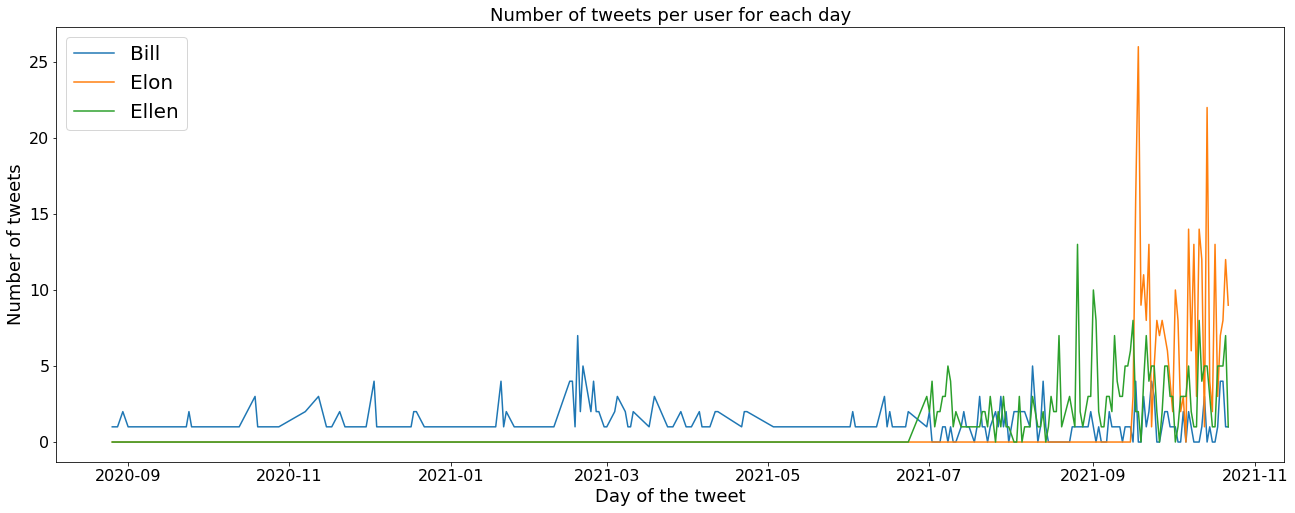

In [20]:
tweetsPerDay.plot(figsize=(22,8), fontsize=16)
plt.xlabel('Day of the tweet', fontsize=18)
plt.ylabel('Number of tweets', fontsize=18)
plt.title('Number of tweets per user for each day', fontsize=18)
plt.legend(names,fontsize=20)

From the graph above we can clearly see that Bill gates tweets less often than the others. While Elon tweets the most with a high volume of tweets each day even passing 20 tweets a day some times. Bill and Ellens volume is quite consistent without spikes. On the other hand Elon has two huge spikes. Lets see if we can find out why.

In [21]:
elonCount = elon.groupby(['Day of the tweet']).count()
elonCount.loc[elonCount['Number Of Tweets'] > 20]

,Number Of Tweets
Day of the tweet,
2021-09-18,26
2021-10-14,22


By doing some research we can find out that on 2021-09-18 it was the launch of Inspiration4 a big project from SpaceX a company that Elon is ceo. On 2021-10-14	Elon anounched that they are in talk with airlines about installing Starlink.

#### Research on the most common day that the users tweet

In [22]:
allTweets = pd.concat([billGatesTimelineFrame, elonMuskTimelineFrame, ellenDeGeneresTimelineFrame])

In [23]:
allTweets['created_at'] = pd.to_datetime(allTweets['created_at'])#SHOULD BE REMOVED
allTweets['Day of Week'] = allTweets['created_at'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
allTweets['Day of Week'] = allTweets['Day of Week'].map(dmap)
allTweets['Hour'] = allTweets['created_at'].apply(lambda time: time.hour)

<AxesSubplot:xlabel='Day of Week', ylabel='Tweets'>

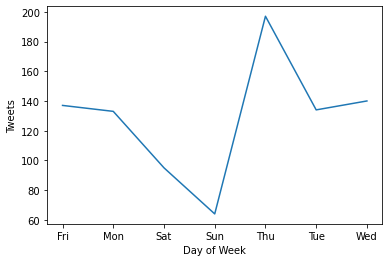

In [24]:
byDay = allTweets.groupby('Day of Week').count()
byDay['id'].plot(ylabel ='Tweets')

Text(3.674999999999997, 0.5, 'Tweets')

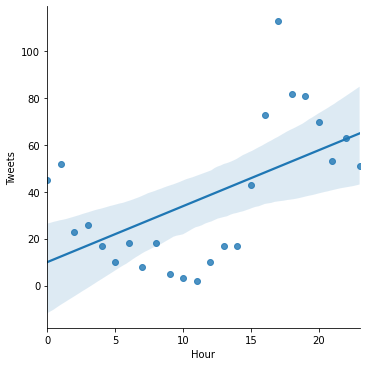

In [25]:
byHour = allTweets.groupby('Hour').count()
fig = sns.lmplot(x='Hour',y='id',data=byHour.reset_index(), )
plt.ylabel('Tweets')

In [26]:
dayTweets = allTweets.groupby(['Day of Week','Hour']).count()['id'].unstack().fillna(0)

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

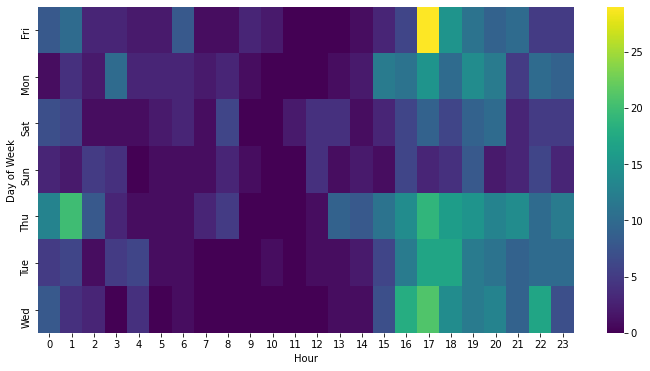

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(dayTweets,cmap='viridis')

From the above graphs, we can see that the users mostly tweet on Thursday, Wednesday, and Friday, and later on the day, mostly in the evening. Although the daily plot clearly shows that most tweets are on Thursday we can see from the heatmap that they tweet more on Fridays at five in the afternoon. Looking at the hourly plot and the heatmap we can see that at five in the afternoon the users tweet more. 

#### Topics that its user talks about

In [28]:
from wordcloud import WordCloud 

In [29]:
def generateWordCloud(dataFrame):
    file = open('wordlist.txt')
    wordFounds = {}
    for text in dataFrame['text']:
        for line in file:
            for word in line.split():
                if word in text:
                    if word in wordFounds:
                        wordFounds[word] +=1
                    else:
                        wordFounds[word] = 1
        file.seek(0)
    file.close()
    wordcloud = WordCloud(collocations = False, background_color = 'white', width = 800, height = 600).generate_from_frequencies(wordFounds)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off");

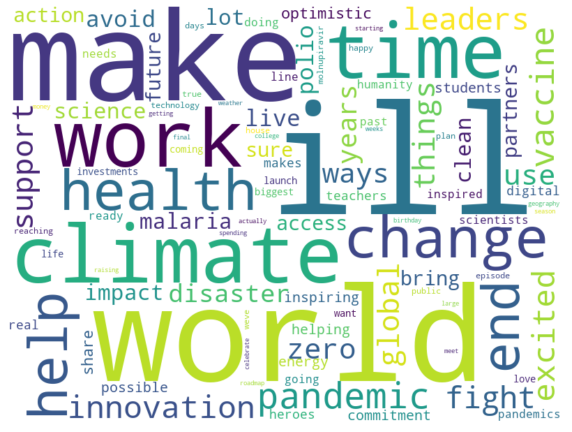

In [30]:
generateWordCloud(billGatesTimelineFrame)

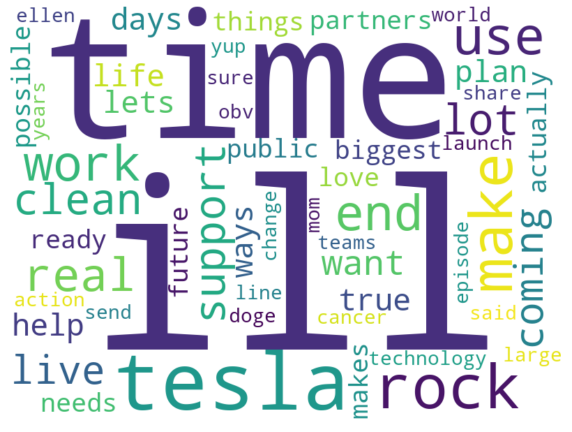

In [31]:
generateWordCloud(elonMuskTimelineFrame)

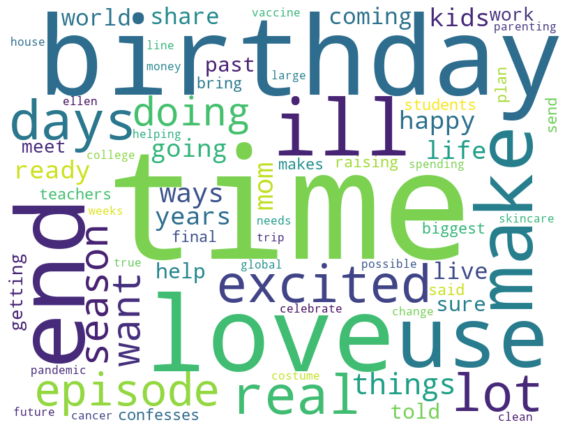

In [32]:
generateWordCloud(ellenDeGeneresTimelineFrame)